## Assignment - 7 5/11/24

## Topic Modeling

## Open the file

In [1]:
import pandas as pd
file = "Restaurant Reviews.csv"
df = pd.read_csv(file)
df.head(20) 

Review  Liked
0                            Wow... Loved this place.    1.0
1                                  Crust is not good.    0.0
2           Not tasty and the texture was just nasty.    0.0
3   Stopped by during the late May bank holiday of...    1.0
4   The selection on the menu was great and so wer...    1.0
5      Now I am getting angry and I want my damn pho.    0.0
6                Honeslty it didn't taste THAT fresh.    0.0
7   The potatoes were like rubber and you could te...    0.0
8                           The fries were great too.    1.0
9                                      A great touch.    1.0
10                           Service was very prompt.    1.0
11                                 Would not go back.    0.0
12  The cashier had no care what so ever on what I...    0.0
13  I tried the Cape Cod ravoli, chicken, with cra...    1.0
14  I was disgusted because I was pretty sure that...    0.0
15  I was shocked because no signs indicate cash o...    0.0
16                                Highly recommended.    1.0
17             Waitress was a little slow in service.    0.0
18  This place is not worth your time, let alone V...    0.0
19                               did not like at all.    0.0

## Look at a couple of texts

In [2]:
print(repr(df.iloc[17]["Review"][0:100]))
print(repr(df.iloc[19]["Review"][0:100]))

'Waitress was a little slow in service.'
'did not like at all.'


## We will split speech into sentences

In [3]:
import re
df["paragraphs"] = df["Review"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

## Start by getting TFIDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert stop words set to a list
stopwords_list = list(stopwords)

# Initialize TfidfVectorizer with the list of stop words
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['Review'])
tfidf_text_vectors.shape

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(2220, 388)

## Make a data frame of sentences

In [5]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "Review": paragraph, "year": year }
for paragraphs, year in zip(df["paragraphs"], df["Liked"])
for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

Review  year
0                           Wow... Loved this place.   1.0
1                                 Crust is not good.   0.0
2          Not tasty and the texture was just nasty.   0.0
3  Stopped by during the late May bank holiday of...   1.0
4  The selection on the menu was great and so wer...   1.0
5     Now I am getting angry and I want my damn pho.   0.0
6               Honeslty it didn't taste THAT fresh.   0.0
7  The potatoes were like rubber and you could te...   0.0
8                          The fries were great too.   1.0
9                                     A great touch.   1.0

## Get the TFIDF of the sentences DF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Use 'english' instead of the set of stop words
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["Review"])
tfidf_para_vectors.shape

(2220, 393)

## NMF

In [7]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

## Let’s look at our 10 topics:

In [8]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   abs(words[largest[i]] * 100.0 / total)))

# Call the function outside its definition with the appropriate arguments
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
 staff (18.86)
 friendly (11.86)
 service (9.85)
 provided (9.57)
 exceptional (8.78)

Topic 01
 service (15.88)
 wait (12.77)
 times (12.53)
 minimal (8.39)
 restaurant (8.04)

Topic 02
 food (18.97)
 taste (4.28)
 lacked (4.25)
 flavor (4.24)
 exquisite (3.28)

Topic 03
 portions (16.63)
 left (15.73)
 satisfied (11.92)
 feeling (11.80)
 generous (10.32)

Topic 04
 waiters (18.39)
 attentive (15.53)
 recommendations (11.78)
 provided (11.16)
 great (7.47)

Topic 05
 dishes (15.79)
 fresh (13.91)
 ingredients (11.85)
 quality (8.75)
 high (7.17)

Topic 06
 clean (23.62)
 maintained (20.95)
 facilities (17.41)
 restaurant (14.30)
 restrooms (8.26)

Topic 07
 good (43.14)
 service (2.32)
 prices (2.29)
 pizza (2.10)
 time (2.07)

Topic 08
 restaurant (12.61)
 options (8.45)
 vegetarian (4.79)
 range (4.52)
 vegan (4.10)

Topic 09
 place (30.41)
 great (4.86)
 recommend (2.87)
 like (2.18)
 amazing (2.02)


## Run same model

In [9]:
from sklearn.decomposition import NMF

# Initialize NMF model
nmf_para_model = NMF(n_components=10, random_state=42)

# Fit NMF model to the TF-IDF vectors
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

# Display topics
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 staff (18.72)
 friendly (11.77)
 service (9.92)
 provided (9.57)
 exceptional (8.77)

Topic 01
 service (15.77)
 wait (12.84)
 times (12.61)
 minimal (8.44)
 restaurant (8.08)

Topic 02
 portions (16.63)
 left (15.71)
 satisfied (11.91)
 feeling (11.78)
 generous (10.32)

Topic 03
 food (18.28)
 taste (4.32)
 lacked (4.30)
 flavor (4.27)
 exquisite (3.32)

Topic 04
 waiters (18.45)
 attentive (15.56)
 recommendations (11.80)
 provided (11.17)
 great (7.39)

Topic 05
 dishes (15.79)
 fresh (13.89)
 ingredients (11.85)
 quality (8.76)
 high (7.18)

Topic 06
 clean (23.62)
 maintained (21.00)
 facilities (17.45)
 restaurant (14.31)
 restrooms (8.27)

Topic 07
 place (30.66)
 great (4.62)
 recommend (2.79)
 like (1.98)
 really (1.93)

Topic 08
 restaurant (12.55)
 options (8.34)
 vegetarian (4.67)
 range (4.50)
 vegan (4.08)

Topic 09
 good (38.01)
 really (3.03)
 service (2.37)
 prices (2.21)
 pizza (2.03)


## How “BIG” is each topic?

In [10]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 8.03164645, 10.5116615 , 14.52451116, 10.32509683,  9.79873291,
        9.11702786,  6.20087778,  6.31655415, 13.98767213, 11.18621924])

## Topic sizes:

In [11]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 8.00722288, 10.4735227 ,  8.50190883, 18.15212736,  9.00458719,
        9.03059447,  7.12264824,  6.64864054, 13.60216351,  9.45658428])

## RUN this code:

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the set of stopwords to a list
stopwords_list = list(stopwords)

# Assuming 'paragraph_df' is defined earlier
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["Review"])

# Check the shape of the document-term matrix
print("Shape of document-term matrix:", count_para_vectors.shape)

# Define and fit the LDA model
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


Shape of document-term matrix: (2220, 388)


## Start by cutting the paragraphs into words:

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the stop words set to a list
stopwords_list = list(stopwords)

# Initialize CountVectorizer with the list of stop words
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["Review"])
print(count_para_vectors.shape)

(2220, 388)


## Run the LDA

In [14]:
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
restaurant clean dishes fresh quality

Topic 2:
food flavor lacked restaurant atmosphere

Topic 3:
provided staff attentive waiters service

Topic 4:
restaurant wait portions times service

Topic 5:
service slow orders restaurant didn

Topic 6:
restaurant options friendly vegetarian range

Topic 7:
food left feeling portions satisfied

Topic 8:
place time great good came

Topic 9:
dishes served tasted ve bread

Topic 10:
waiters ambiance restaurant inattentive staff


## Topic sizes

In [15]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 9.09439702, 11.92599773, 10.2890204 , 10.36709616, 10.88505323,
       10.28751616,  9.78777671, 11.40672925,  8.28864114,  7.66777218])

## The amazing pyLDAvis!

In [16]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


## draw wordclouds for the 10 topics

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

/var/folders/j1/mtqy4hsd4ys7vqggnmwzk35m0000gn/T/ipykernel_5267/1084829249.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## The NMF wordclouds:

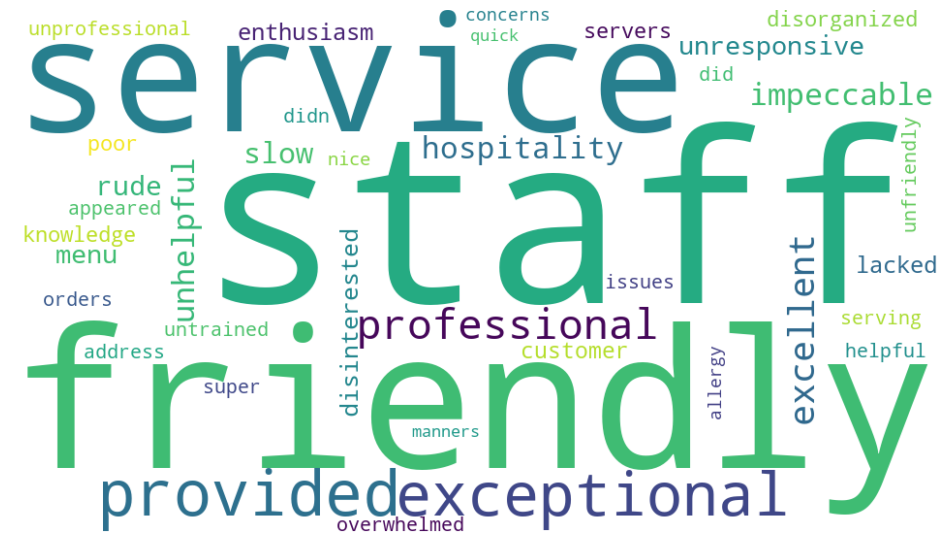

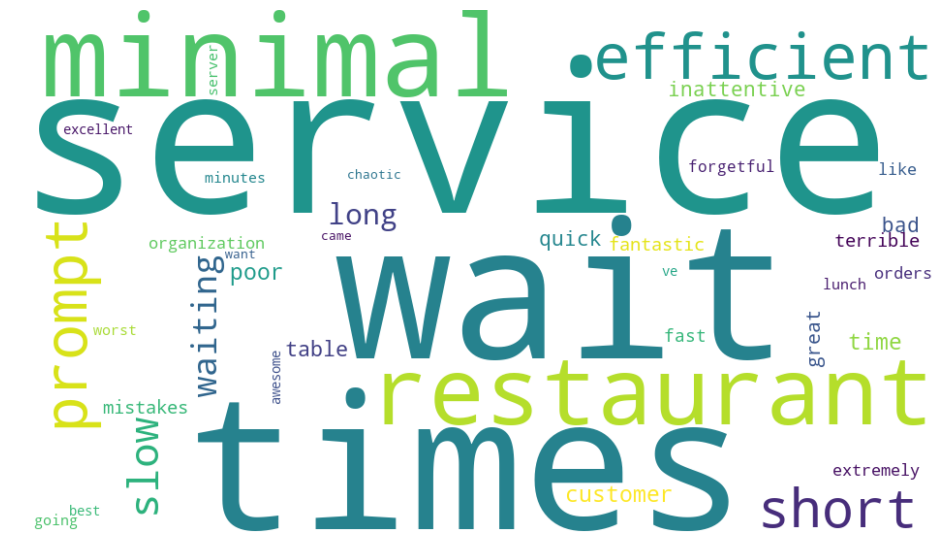

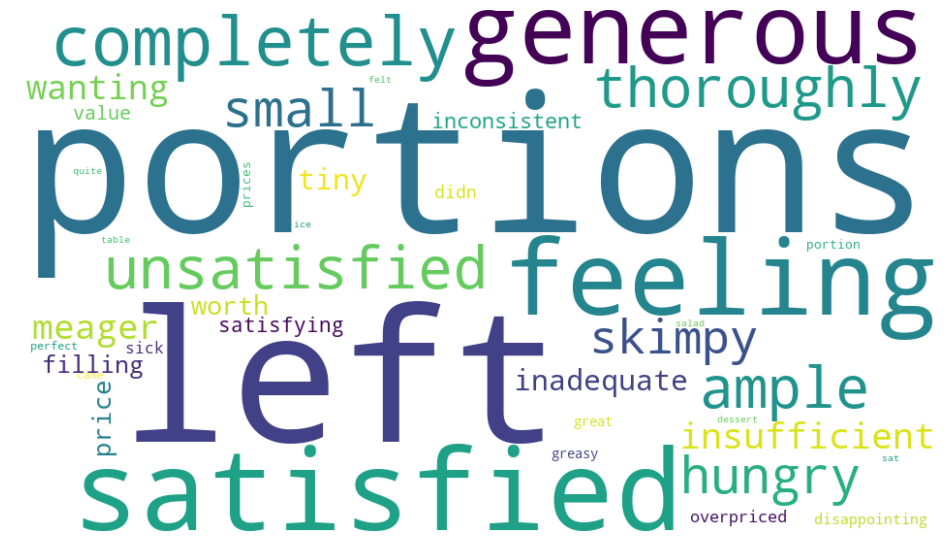

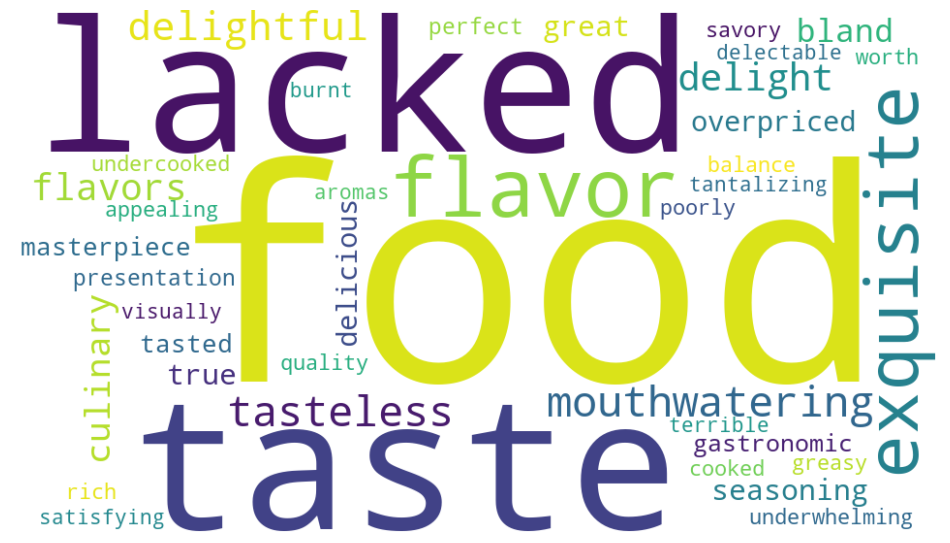

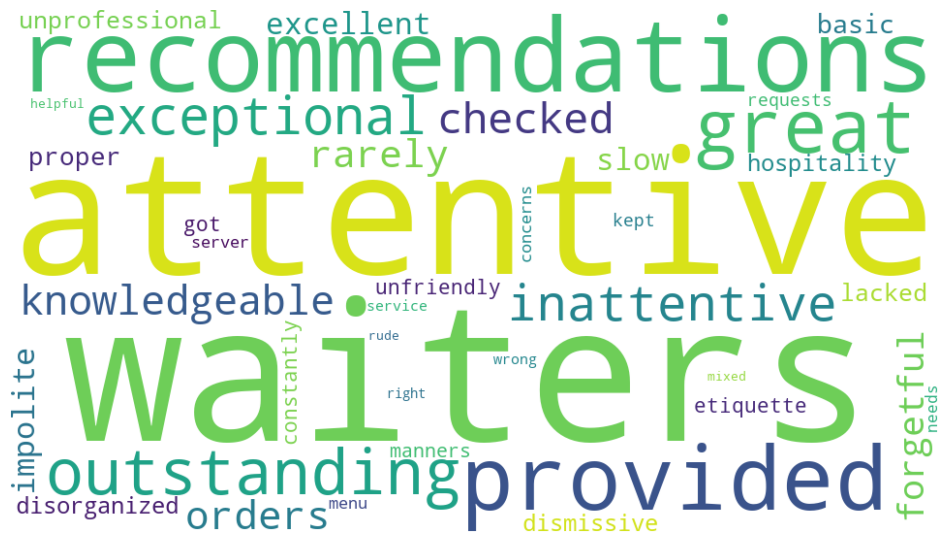

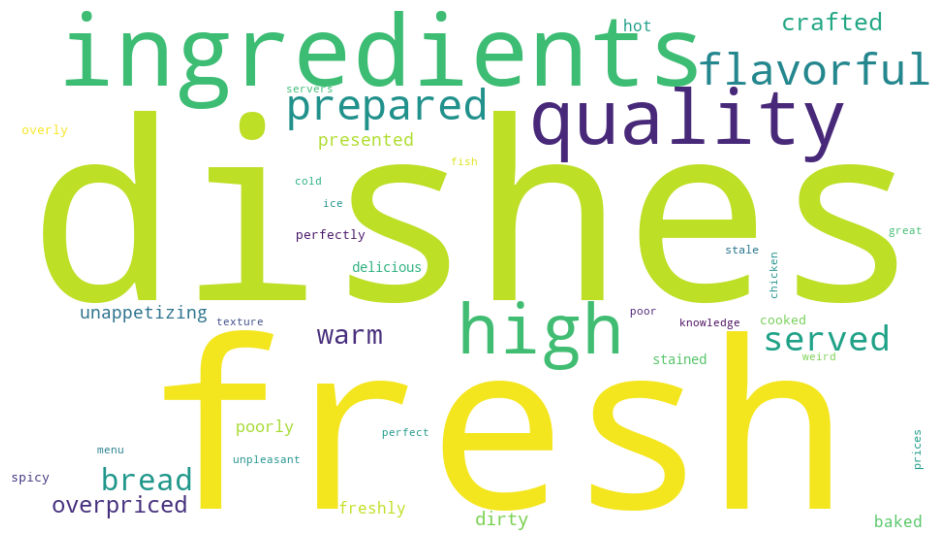

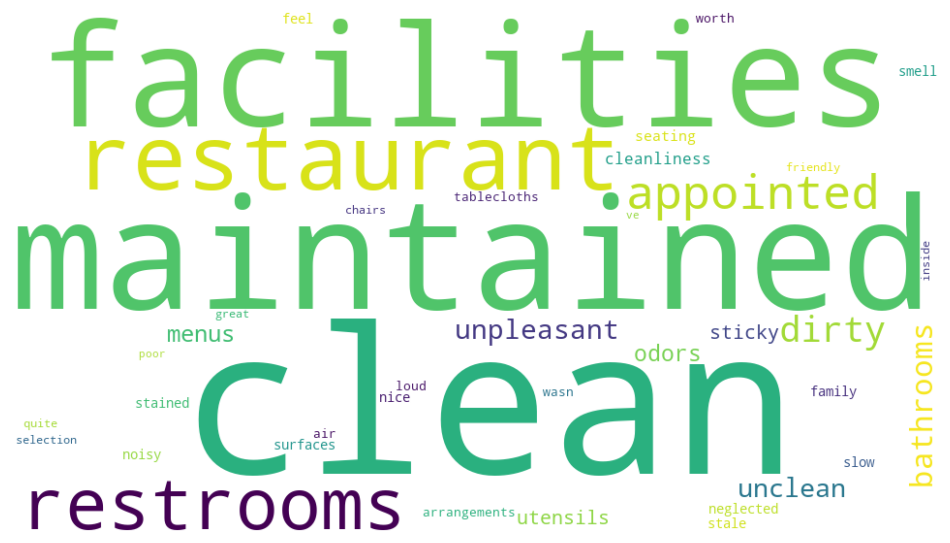

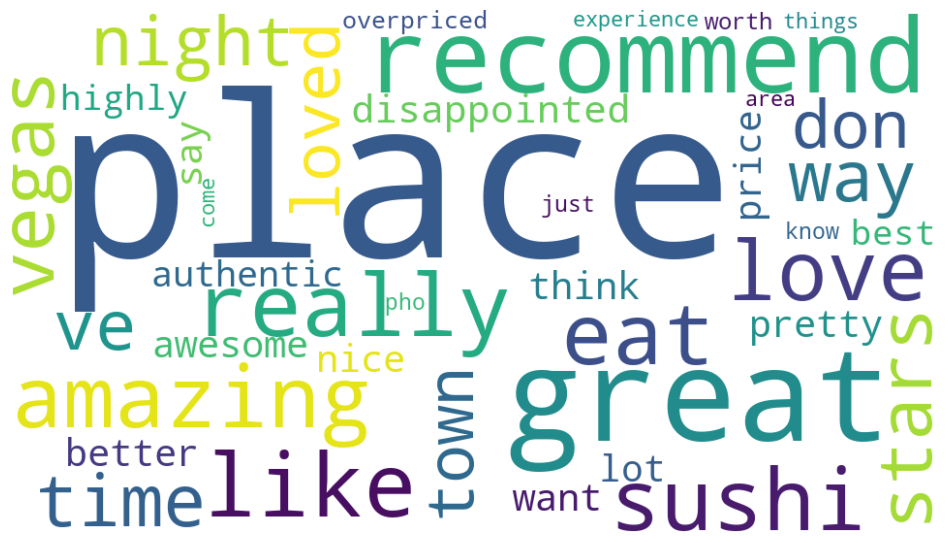

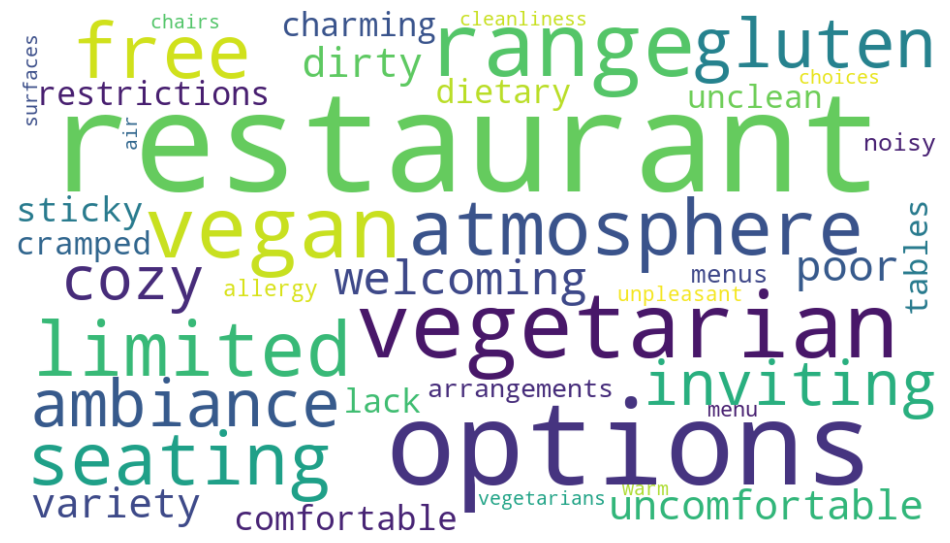

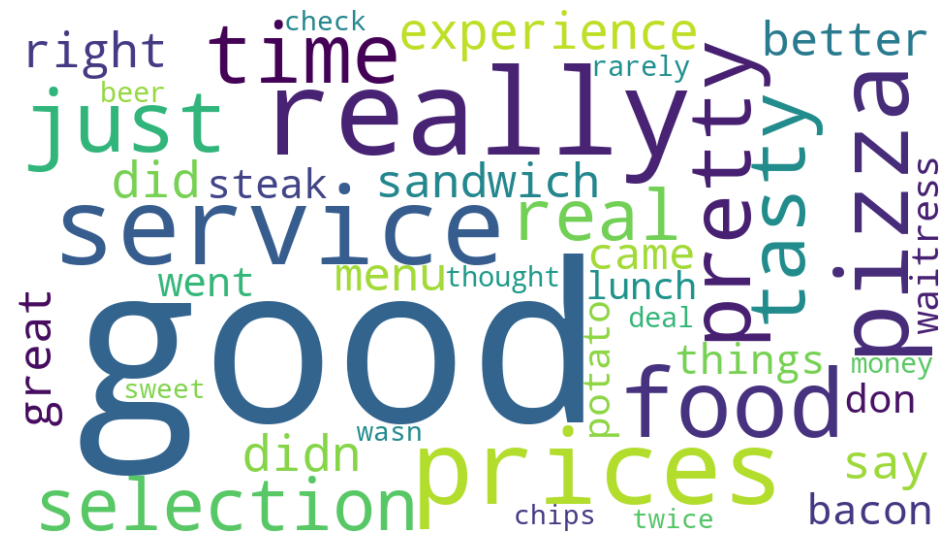

In [18]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

## The LDA wordclouds

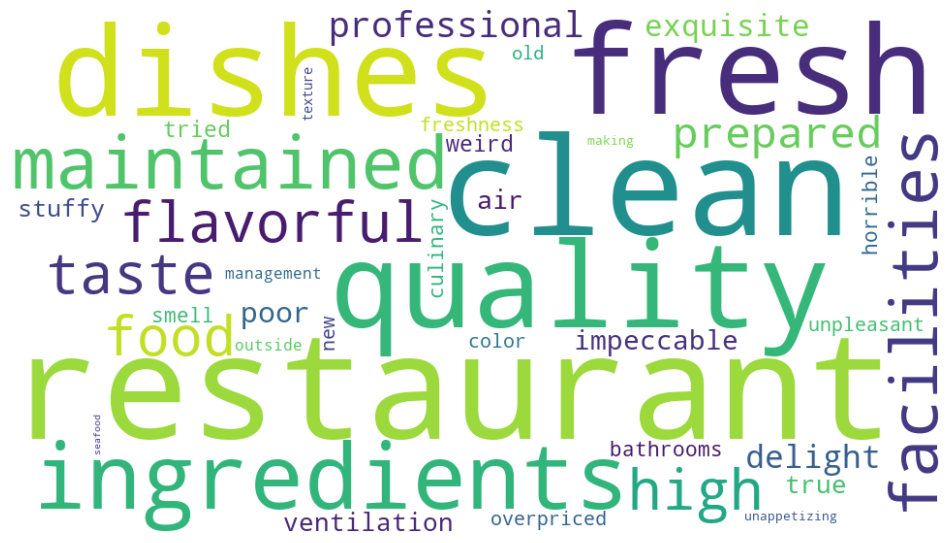

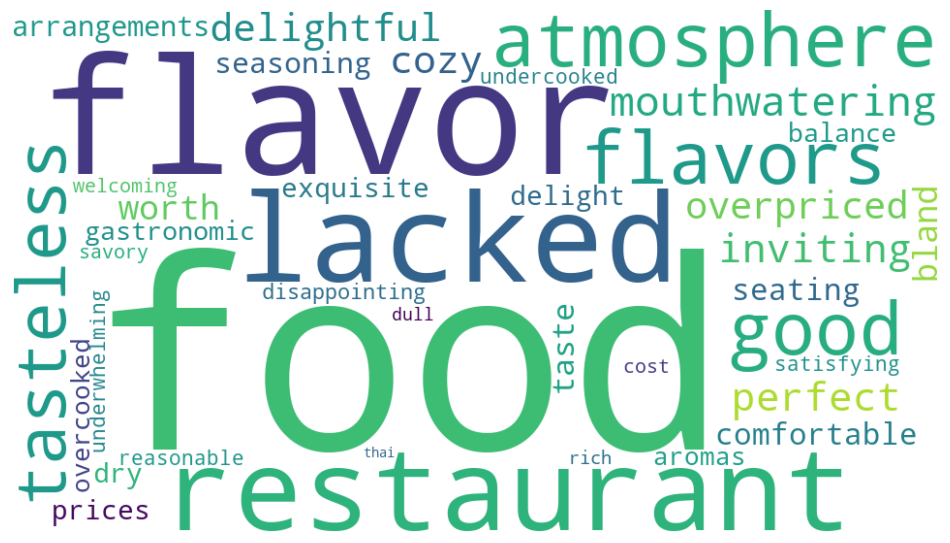

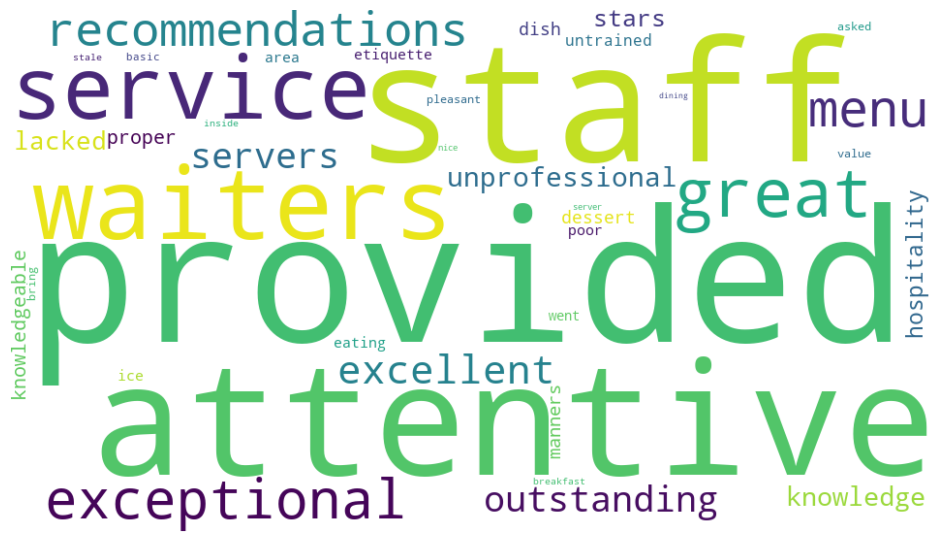

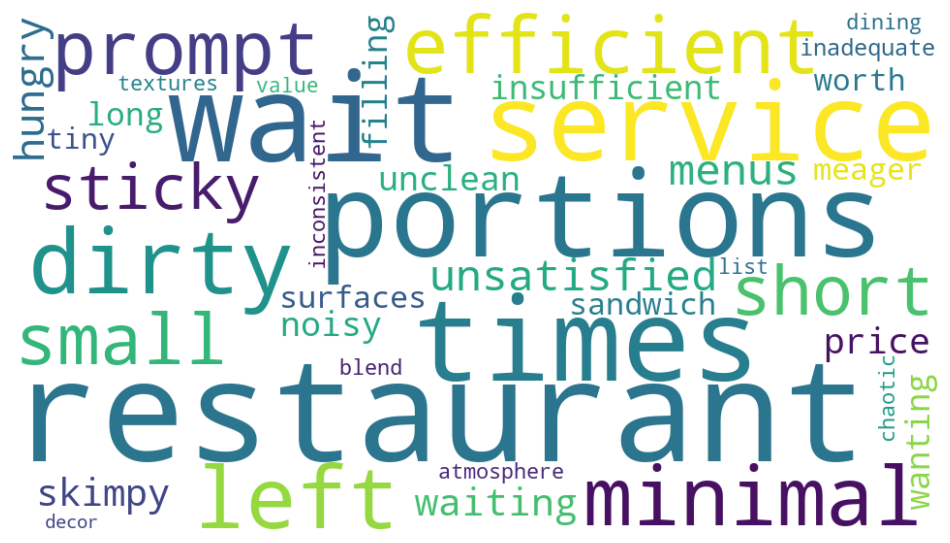

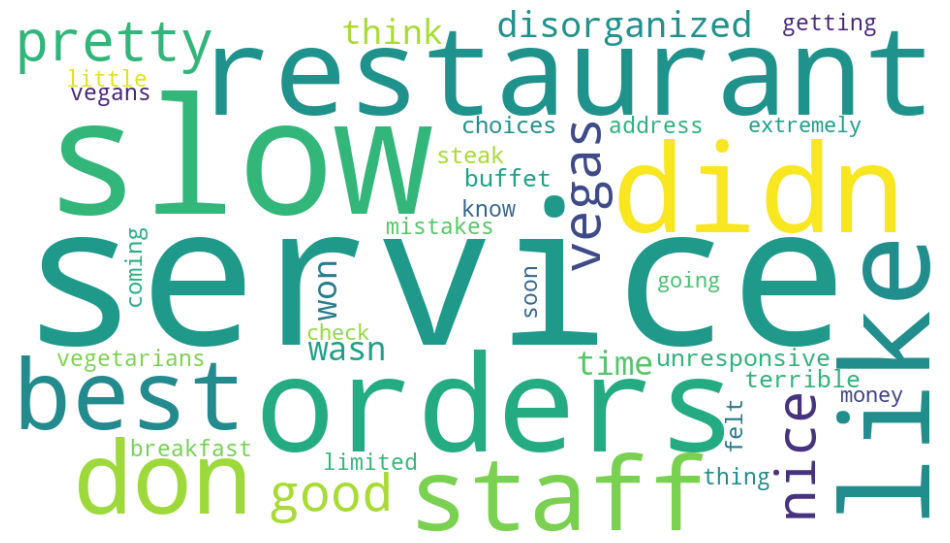

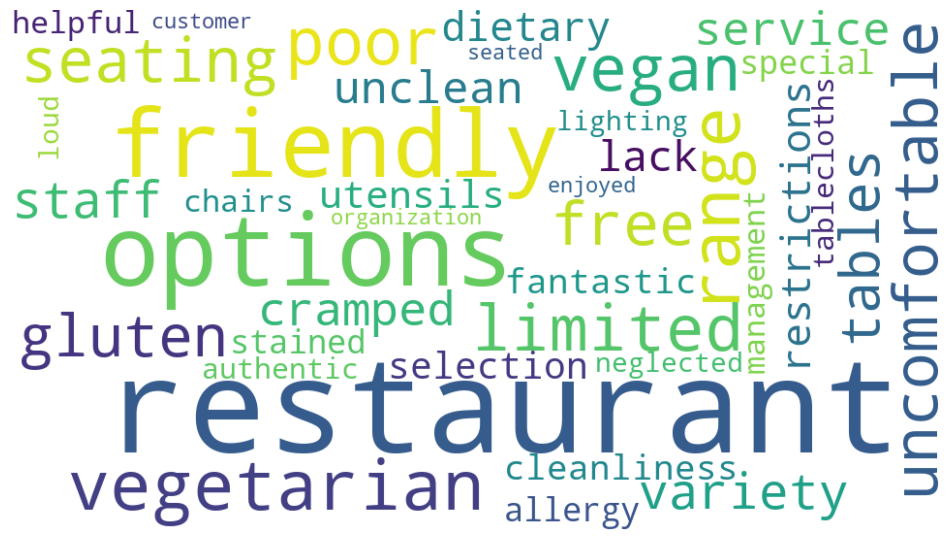

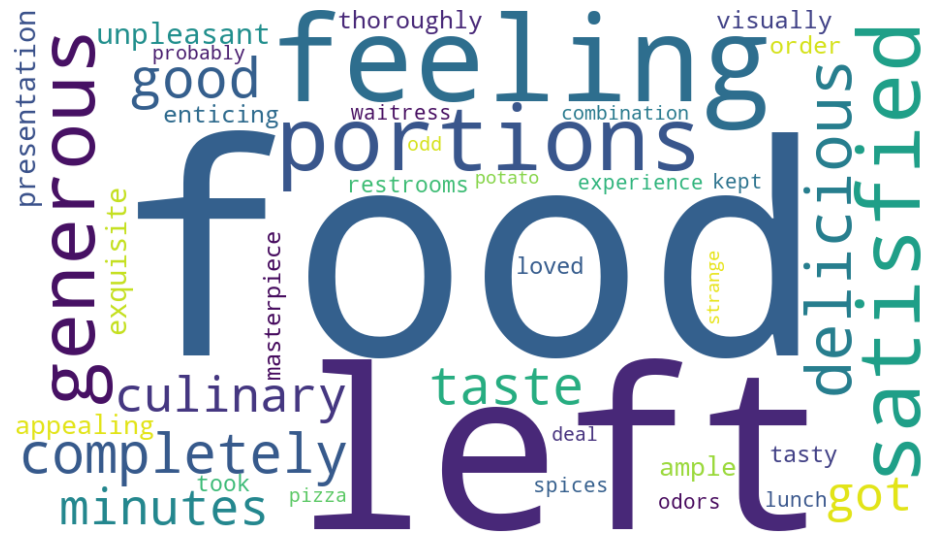

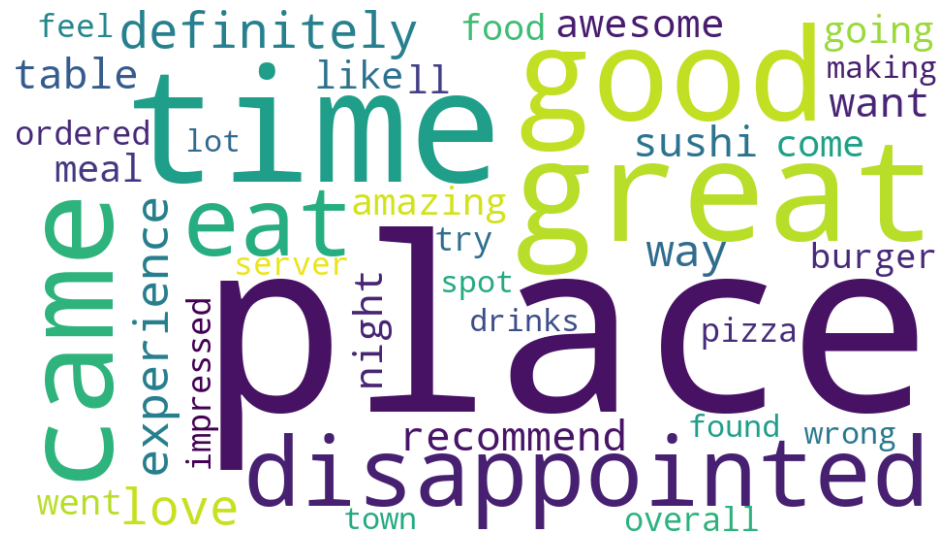

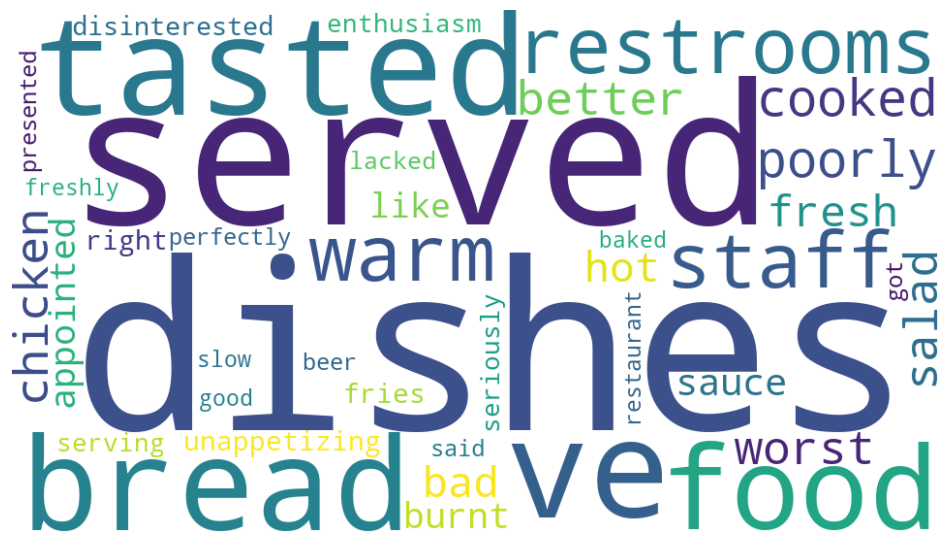

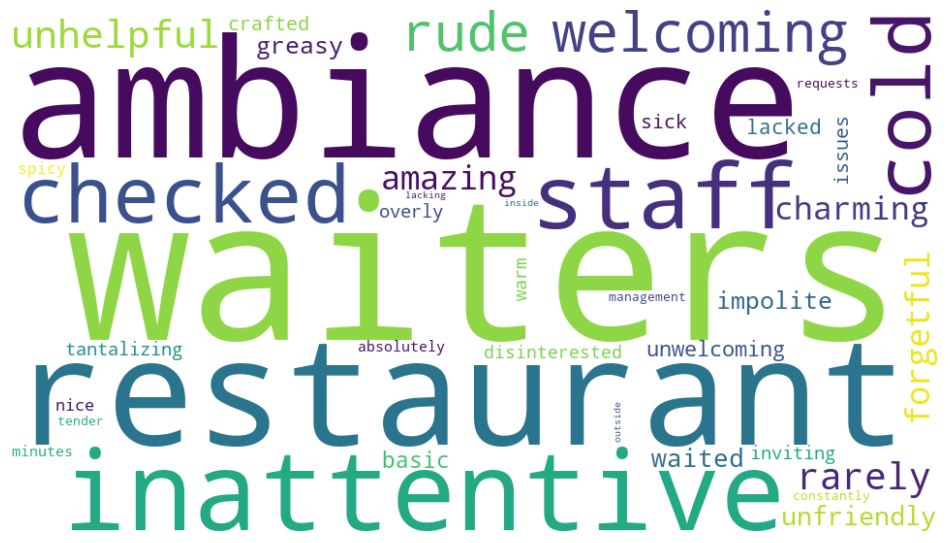

In [19]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [20]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

## Separate data by year

In [21]:
from tqdm.auto import tqdm
import numpy as np

year_data = []

unique_years = np.unique(paragraph_df["year"])

for year in tqdm(unique_years):
    year_indices = np.array(paragraph_df["year"] == year)
    if np.any(year_indices):  # Check if there are samples available for the current year
        W_year = nmf_para_model.transform(tfidf_para_vectors[year_indices])
        year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))

  0%|          | 0/3 [00:00<?, ?it/s]

## Draw time chart

<Axes: xlabel='price'>

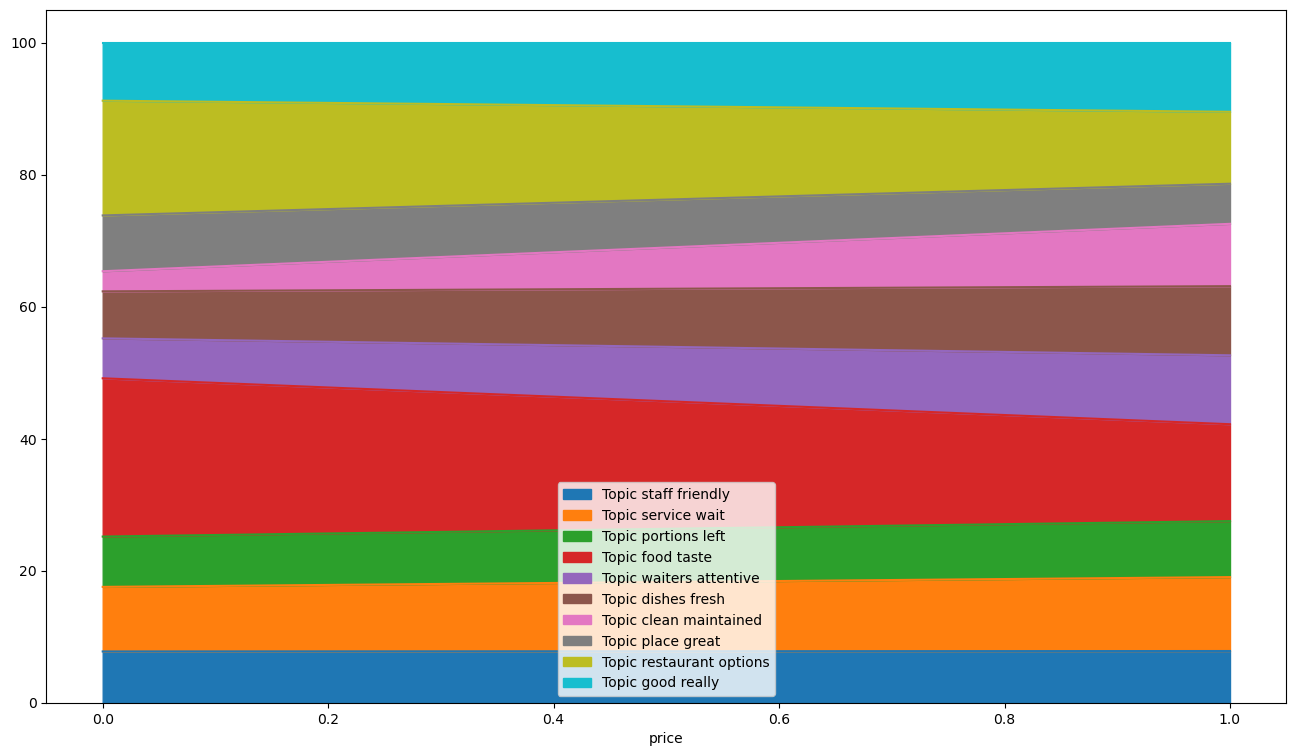

In [22]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["price"] +
topic_names).set_index("price")
df_year.plot.area(figsize=(16,9))